In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# 1. Load the dataset
data = load_breast_cancer()
X = data.data        # shape: (569, 30)
y = data.target      # binary: 1 (benign), 0 (malignant)

# 2. Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA (keep 95% of the variance)
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 4. Output shapes
print("Original shape:", X.shape)
print("Transformed shape (after PCA):", X_pca.shape)
print(y)


Original shape: (569, 30)
Transformed shape (after PCA): (569, 10)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 

In [ ]:
import numpy as np

# 5. Explained variance ratio (percentage of variance explained by each component)
print("Explained variance ratio per component:")
print(pca.explained_variance_ratio_)

first_component_weights = pca.components_[0]


sorted_idx = np.argsort(np.abs(first_component_weights))[::-1]


top_10_features = np.array(data.feature_names)[sorted_idx[:10]]

# Print the top 10 features
print("Top 10 features contributing to the first principal component:")
print(top_10_features)




Explained variance ratio per component:
[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]
Top 10 features contributing to the first principal component:
['mean concave points' 'mean concavity' 'worst concave points'
 'mean compactness' 'worst perimeter' 'worst concavity' 'worst radius'
 'mean perimeter' 'worst area' 'mean area']


In [ ]:
print(data.target_names)

['malignant' 'benign']


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class NeuralNet(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNet, self).__init__()

        # Define layers
        self.fc1 = nn.Linear(input_dim, 32)  # First hidden layer
        self.fc2 = nn.Linear(32, 16)         # Second hidden layer
        self.fc3 = nn.Linear(16, 1)          # Output layer (1 neuron for binary output)

    def forward(self, x):
        # Apply ReLU activation on hidden layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        # Sigmoid activation on output for binary classification
        x = torch.sigmoid(self.fc3(x))

        return x


In [ ]:
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


X_tensor = torch.tensor(X_pca, dtype=torch.float32)  # X_pca as Tensor
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Ensure y is in proper shape

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tensor, y_tensor, test_size=0.3, random_state=42)


In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# Create TensorDataset for training and validation
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

# Create DataLoader for batching
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
# Initialize model
input_dim = X_train.shape[1]
model = NeuralNet(input_dim)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)


Epoch 1/50 - Train Loss: 0.6963, Val Loss: 0.6593, Accuracy: 63.16%, AUC: 0.6340
Epoch 2/50 - Train Loss: 0.6478, Val Loss: 0.6135, Accuracy: 63.16%, AUC: 0.9907
Epoch 3/50 - Train Loss: 0.5998, Val Loss: 0.5639, Accuracy: 78.95%, AUC: 0.9940
Epoch 4/50 - Train Loss: 0.5501, Val Loss: 0.5003, Accuracy: 87.72%, AUC: 0.9944
Epoch 5/50 - Train Loss: 0.4805, Val Loss: 0.4261, Accuracy: 93.57%, AUC: 0.9951
Epoch 6/50 - Train Loss: 0.4081, Val Loss: 0.3466, Accuracy: 94.74%, AUC: 0.9957
Epoch 7/50 - Train Loss: 0.3288, Val Loss: 0.2765, Accuracy: 95.32%, AUC: 0.9959
Epoch 8/50 - Train Loss: 0.2635, Val Loss: 0.2184, Accuracy: 95.91%, AUC: 0.9966
Epoch 9/50 - Train Loss: 0.2083, Val Loss: 0.1745, Accuracy: 95.91%, AUC: 0.9972
Epoch 10/50 - Train Loss: 0.1677, Val Loss: 0.1439, Accuracy: 96.49%, AUC: 0.9974


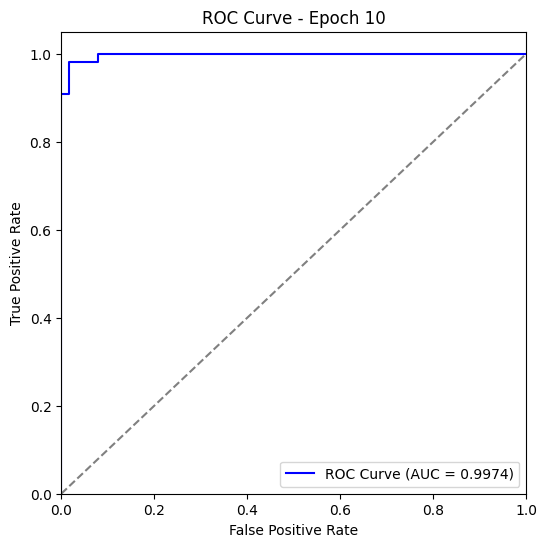

Epoch 11/50 - Train Loss: 0.1388, Val Loss: 0.1225, Accuracy: 98.25%, AUC: 0.9976
Epoch 12/50 - Train Loss: 0.1272, Val Loss: 0.1075, Accuracy: 98.25%, AUC: 0.9976
Epoch 13/50 - Train Loss: 0.1151, Val Loss: 0.0960, Accuracy: 98.25%, AUC: 0.9976
Epoch 14/50 - Train Loss: 0.0940, Val Loss: 0.0892, Accuracy: 98.25%, AUC: 0.9981
Epoch 15/50 - Train Loss: 0.0857, Val Loss: 0.0824, Accuracy: 98.25%, AUC: 0.9981
Epoch 16/50 - Train Loss: 0.0827, Val Loss: 0.0770, Accuracy: 97.66%, AUC: 0.9982
Epoch 17/50 - Train Loss: 0.0776, Val Loss: 0.0730, Accuracy: 97.66%, AUC: 0.9982
Epoch 18/50 - Train Loss: 0.0704, Val Loss: 0.0707, Accuracy: 97.66%, AUC: 0.9984
Epoch 19/50 - Train Loss: 0.0678, Val Loss: 0.0680, Accuracy: 97.66%, AUC: 0.9985
Epoch 20/50 - Train Loss: 0.0639, Val Loss: 0.0664, Accuracy: 97.66%, AUC: 0.9984


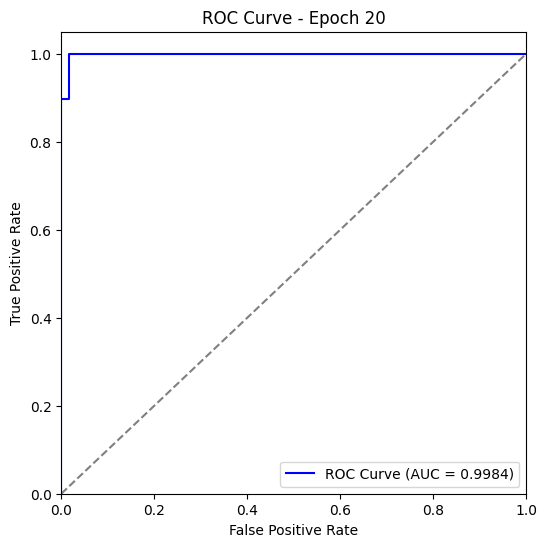

Epoch 21/50 - Train Loss: 0.0625, Val Loss: 0.0641, Accuracy: 97.66%, AUC: 0.9981
Epoch 22/50 - Train Loss: 0.0569, Val Loss: 0.0617, Accuracy: 97.66%, AUC: 0.9982
Epoch 23/50 - Train Loss: 0.0570, Val Loss: 0.0610, Accuracy: 97.66%, AUC: 0.9979
Epoch 24/50 - Train Loss: 0.0529, Val Loss: 0.0600, Accuracy: 97.66%, AUC: 0.9978
Epoch 25/50 - Train Loss: 0.0524, Val Loss: 0.0594, Accuracy: 97.66%, AUC: 0.9978
Epoch 26/50 - Train Loss: 0.0498, Val Loss: 0.0590, Accuracy: 97.66%, AUC: 0.9978
Epoch 27/50 - Train Loss: 0.0493, Val Loss: 0.0594, Accuracy: 97.66%, AUC: 0.9978
Epoch 28/50 - Train Loss: 0.0477, Val Loss: 0.0584, Accuracy: 97.66%, AUC: 0.9978
Epoch 29/50 - Train Loss: 0.0464, Val Loss: 0.0589, Accuracy: 97.66%, AUC: 0.9976
Epoch 30/50 - Train Loss: 0.0542, Val Loss: 0.0584, Accuracy: 97.66%, AUC: 0.9976


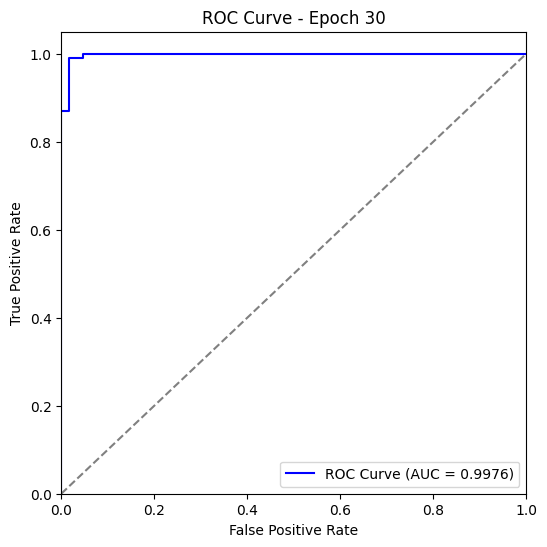

Epoch 31/50 - Train Loss: 0.0435, Val Loss: 0.0590, Accuracy: 98.25%, AUC: 0.9975
Epoch 32/50 - Train Loss: 0.0413, Val Loss: 0.0581, Accuracy: 98.83%, AUC: 0.9974
Epoch 33/50 - Train Loss: 0.0399, Val Loss: 0.0583, Accuracy: 98.83%, AUC: 0.9972
Epoch 34/50 - Train Loss: 0.0403, Val Loss: 0.0591, Accuracy: 98.25%, AUC: 0.9969
Epoch 35/50 - Train Loss: 0.0401, Val Loss: 0.0583, Accuracy: 98.83%, AUC: 0.9968
Epoch 36/50 - Train Loss: 0.0397, Val Loss: 0.0570, Accuracy: 98.83%, AUC: 0.9966
Epoch 37/50 - Train Loss: 0.0435, Val Loss: 0.0589, Accuracy: 98.83%, AUC: 0.9966
Epoch 38/50 - Train Loss: 0.0359, Val Loss: 0.0604, Accuracy: 98.83%, AUC: 0.9963
Epoch 39/50 - Train Loss: 0.0330, Val Loss: 0.0600, Accuracy: 98.83%, AUC: 0.9963
Epoch 40/50 - Train Loss: 0.0327, Val Loss: 0.0599, Accuracy: 98.83%, AUC: 0.9962


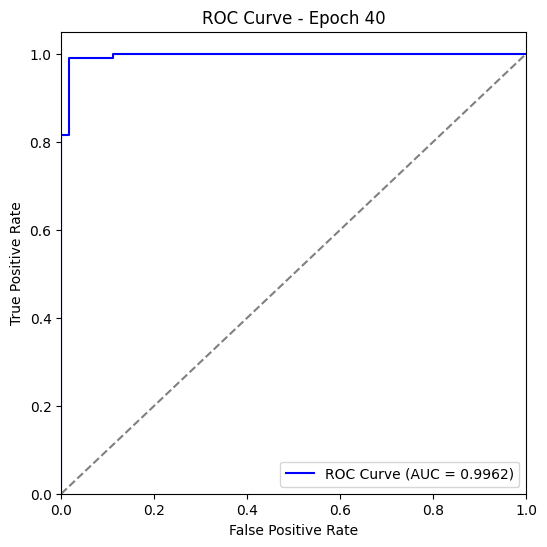

Epoch 41/50 - Train Loss: 0.0319, Val Loss: 0.0606, Accuracy: 98.83%, AUC: 0.9962
Epoch 42/50 - Train Loss: 0.0311, Val Loss: 0.0617, Accuracy: 98.83%, AUC: 0.9959
Epoch 43/50 - Train Loss: 0.0301, Val Loss: 0.0606, Accuracy: 98.83%, AUC: 0.9959
Epoch 44/50 - Train Loss: 0.0287, Val Loss: 0.0619, Accuracy: 98.83%, AUC: 0.9957
Epoch 45/50 - Train Loss: 0.0276, Val Loss: 0.0623, Accuracy: 98.83%, AUC: 0.9956
Epoch 46/50 - Train Loss: 0.0267, Val Loss: 0.0619, Accuracy: 98.83%, AUC: 0.9957
Epoch 47/50 - Train Loss: 0.0275, Val Loss: 0.0620, Accuracy: 98.83%, AUC: 0.9957
Epoch 48/50 - Train Loss: 0.0255, Val Loss: 0.0613, Accuracy: 98.83%, AUC: 0.9957
Epoch 49/50 - Train Loss: 0.0249, Val Loss: 0.0626, Accuracy: 98.83%, AUC: 0.9957
Epoch 50/50 - Train Loss: 0.0242, Val Loss: 0.0650, Accuracy: 98.83%, AUC: 0.9956


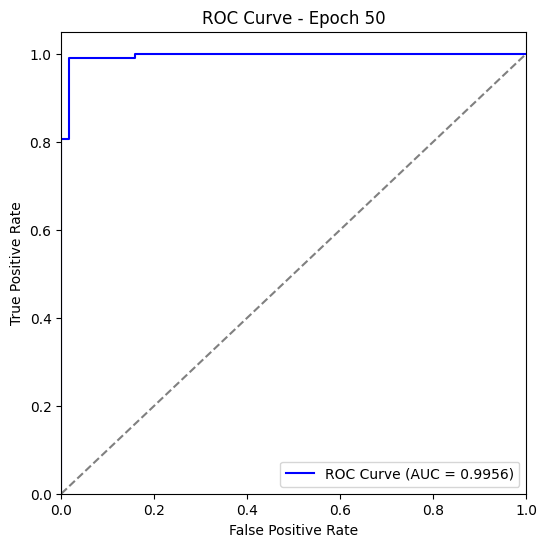

In [ ]:
num_epochs = 50
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0

    for inputs, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss for this epoch
    avg_train_loss = running_loss / len(train_loader)

    # Validation after each epoch
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    all_labels = []  # Collect all labels for ROC
    all_preds = []   # Collect all predicted probabilities for ROC

    with torch.no_grad():  # Disable gradient tracking for validation
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Convert outputs to binary predictions (0 or 1)
            predicted = (outputs > 0.5).float()

            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)

            # Store true labels and predicted probabilities for ROC curve
            all_labels.extend(labels.numpy())
            all_preds.extend(outputs.numpy())

    avg_val_loss = val_loss / len(val_loader)
    accuracy = correct_predictions / total_predictions * 100

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(all_labels, all_preds)
    auc_score = auc(fpr, tpr)

    print(f"Epoch {epoch+1}/{num_epochs} - "
          f"Train Loss: {avg_train_loss:.4f}, "
          f"Val Loss: {avg_val_loss:.4f}, "
          f"Accuracy: {accuracy:.2f}%, "
          f"AUC: {auc_score:.4f}")


    if (epoch + 1) % 10 == 0:
        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.4f})')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - Epoch {epoch+1}')
        plt.legend(loc='lower right')
        plt.show()


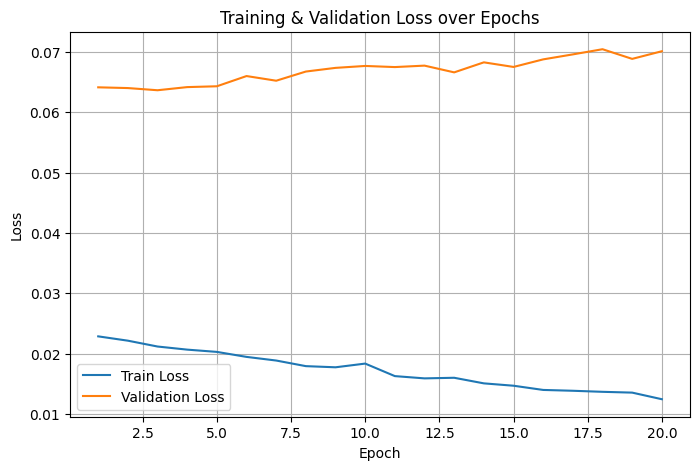

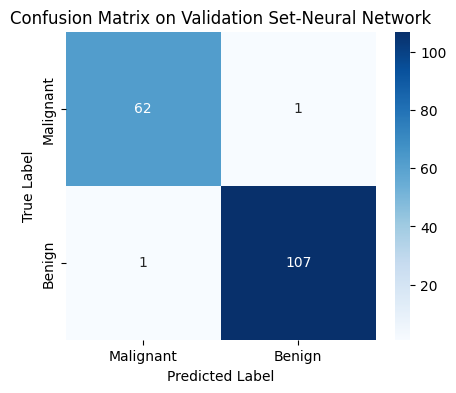

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns


num_epochs = 20
train_losses = []
val_losses = []
all_val_labels = []
all_val_preds = []

for epoch in range(num_epochs):

    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)


    model.eval()
    running_val_loss = 0.0
    epoch_labels = []
    epoch_preds  = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            running_val_loss += criterion(outputs, labels).item()
            preds = (outputs > 0.5).float()
            epoch_labels.extend(labels.cpu().numpy())
            epoch_preds.extend(preds.cpu().numpy())
    avg_val_loss = running_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    # Store the final epoch’s labels & predictions for confusion matrix
    if epoch == num_epochs - 1:
        all_val_labels = epoch_labels
        all_val_preds  = epoch_preds


plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses,   label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()


cm = confusion_matrix(all_val_labels, all_val_preds)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on Validation Set-Neural Network')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# After all_val_labels and all_val_preds are set:
accuracy = accuracy_score(all_val_labels, all_val_preds)
f1      = f1_score(all_val_labels, all_val_preds)
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation F1 Score: {f1:.4f}")

Validation Accuracy: 0.9883
Validation F1 Score: 0.9907


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold
import numpy as np


class NeuralNet(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x


X_tensor = torch.tensor(X_pca, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# K-Fold setup
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
epochs = 29
batch_size = 32
learning_rate = 0.001

fold_accuracies = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_tensor)):
    print(f"\n🔁 Fold {fold + 1}/{k}")

    # Split data
    X_train, X_val = X_tensor[train_idx], X_tensor[val_idx]
    y_train, y_val = y_tensor[train_idx], y_tensor[val_idx]

    # Loaders
    train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=batch_size)

    # Model
    model = NeuralNet(X_tensor.shape[1])
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.BCELoss()

    # Training loop
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_loader:
            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()

    # Evaluation on validation fold
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            preds = model(xb)
            predicted = (preds > 0.5).float()
            correct += (predicted == yb).sum().item()
            total += yb.size(0)
    accuracy = correct / total
    print(f"✅ Fold {fold + 1} Accuracy: {accuracy:.4f}")
    fold_accuracies.append(accuracy)

# Final results
mean_acc = np.mean(fold_accuracies)
print(f"\n📊 Average Accuracy across {k} folds: {mean_acc:.4f}")



🔁 Fold 1/5
✅ Fold 1 Accuracy: 0.9649

🔁 Fold 2/5
✅ Fold 2 Accuracy: 0.9912

🔁 Fold 3/5
✅ Fold 3 Accuracy: 0.9649

🔁 Fold 4/5
✅ Fold 4 Accuracy: 0.9912

🔁 Fold 5/5
✅ Fold 5 Accuracy: 0.9823

📊 Average Accuracy across 5 folds: 0.9789


✅ Accuracy: 0.9766
📈 AUC: 0.9962


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


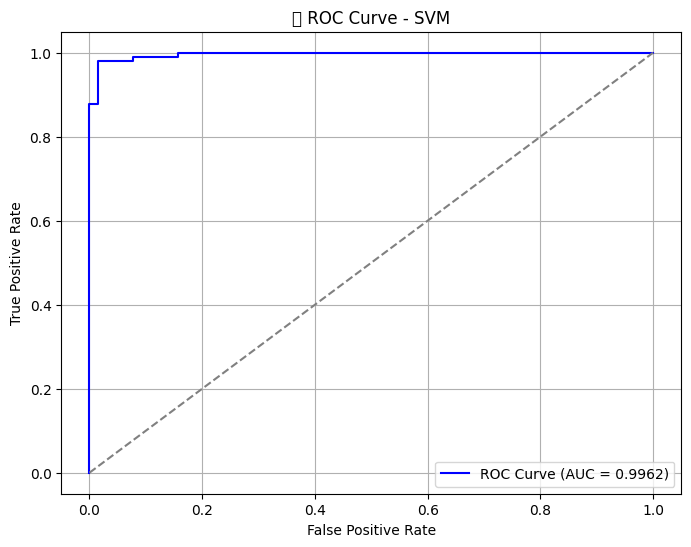

🧮 F1 Score: 0.9813
Confusion Matrix:
[[ 62   2]
 [  2 105]]


/tmp/ipython-input-3037216480.py:50: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


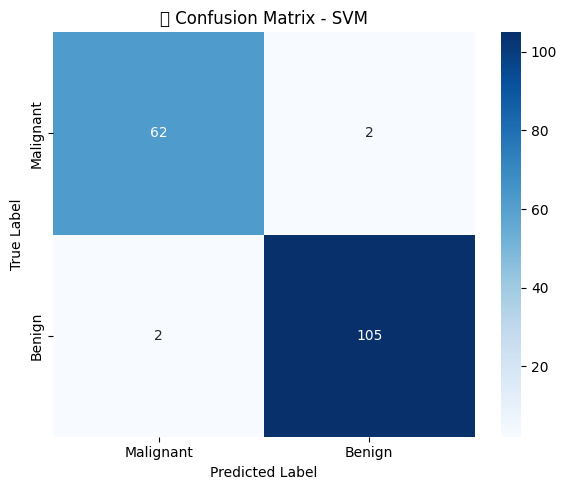

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

# Train SVM with RBF kernel and probability output
model = SVC(C = 0.6,kernel='rbf', probability=True, random_state=42)
model.fit(X_train, y_train)

# Predict and compute probability scores
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.4f}")

# ROC & AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
print(f"📈 AUC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('📉 ROC Curve - SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"🧮 F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('🧩 Confusion Matrix - SVM')
plt.tight_layout()
plt.show()


✅ Best C: 0.6
✅ Accuracy: 0.9766
📈 AUC: 0.9962


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


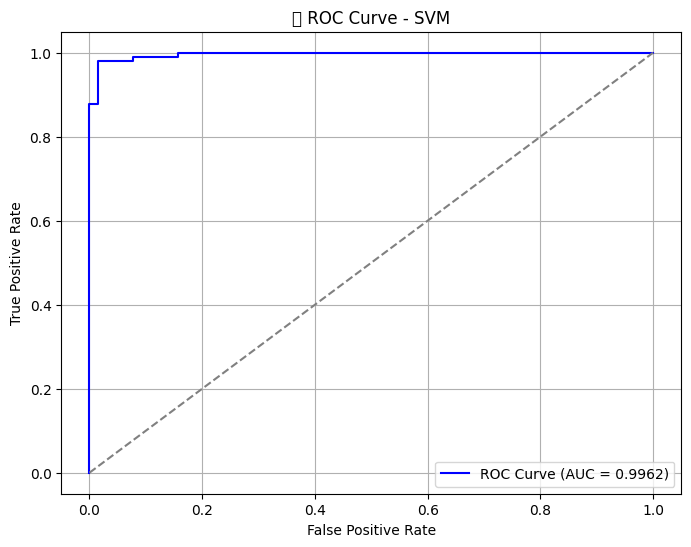

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

# Define the parameter grid for C
param_grid = {'C': np.arange(0.1, 10, 0.5)}  # Values from 0.1 to 10 with an increment of 0.5

# Initialize the SVM model with RBF kernel
svc = SVC(kernel='rbf', probability=True, random_state=42)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameter (C) and the best model
best_C = grid_search.best_params_['C']
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Best C: {best_C}")
print(f"✅ Accuracy: {accuracy:.4f}")

# ROC & AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
print(f"📈 AUC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('📉 ROC Curve - SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()



In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []

print("🔁 Starting 5-Fold Cross-Validation...\n")

for fold, (train_index, test_index) in enumerate(kf.split(X_pca, y), 1):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train SVM
    model = SVC(C=0.6, kernel='rbf', probability=True, random_state=42)
    model.fit(X_train, y_train)

    # Predict & Evaluate
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    fold_accuracies.append(acc)

    print(f"✅ Fold {fold} Accuracy: {acc:.4f}")

# Average Accuracy
avg_accuracy = np.mean(fold_accuracies)
print(f"\n📊 Average Accuracy across 5 folds: {avg_accuracy:.4f}")


🔁 Starting 5-Fold Cross-Validation...

✅ Fold 1 Accuracy: 0.9825
✅ Fold 2 Accuracy: 0.9386
✅ Fold 3 Accuracy: 0.9737
✅ Fold 4 Accuracy: 0.9825
✅ Fold 5 Accuracy: 0.9735

📊 Average Accuracy across 5 folds: 0.9701
